# DecisionTree

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
#from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.preprocessing import scale
import warnings
warnings.filterwarnings('ignore')

In [82]:
# import some data to play with
sales = pd.read_csv('Company_Data.csv')

In [83]:
sales

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [84]:
sales.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [85]:
sales['ShelveLoc']=sales['ShelveLoc'].map({'Good':1,'Medium':2,'Bad':3})

In [86]:
sales["SalesRating"] = pd.cut(sales["Sales"], bins = [0,5,10,20], labels = ["Low Sales","Avergae Sales","Great Sales"])
sales['SalesRating']=sales['SalesRating'].map({'Low Sales':1,'Avergae Sales':2,'Great Sales':3})

In [87]:
sales

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,SalesRating
0,9.50,138,73,11,276,120,3,42,17,Yes,Yes,2
1,11.22,111,48,16,260,83,1,65,10,Yes,Yes,3
2,10.06,113,35,10,269,80,2,59,12,Yes,Yes,3
3,7.40,117,100,4,466,97,2,55,14,Yes,Yes,2
4,4.15,141,64,3,340,128,3,38,13,Yes,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,Yes,Yes,3
396,6.14,139,23,3,37,120,2,55,11,No,Yes,2
397,7.41,162,26,12,368,159,2,40,18,Yes,Yes,2
398,5.94,100,79,7,284,95,3,50,12,Yes,Yes,2


In [88]:
label_encoder = preprocessing.LabelEncoder()
sales['Urban']= label_encoder.fit_transform(sales['Urban'])
sales['US']= label_encoder.fit_transform(sales['US'])

In [89]:
sales = sales.drop(['Sales'], axis= 1)

In [90]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   CompPrice    400 non-null    int64   
 1   Income       400 non-null    int64   
 2   Advertising  400 non-null    int64   
 3   Population   400 non-null    int64   
 4   Price        400 non-null    int64   
 5   ShelveLoc    400 non-null    int64   
 6   Age          400 non-null    int64   
 7   Education    400 non-null    int64   
 8   Urban        400 non-null    int64   
 9   US           400 non-null    int64   
 10  SalesRating  399 non-null    category
dtypes: category(1), int64(10)
memory usage: 31.9 KB


In [91]:
sales.dropna(inplace =True)

In [92]:
# Declaring features & target
x = sales.drop(['SalesRating'], axis=1)
y = sales['SalesRating']

In [93]:
x

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,3,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,3,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1
396,139,23,3,37,120,2,55,11,0,1
397,162,26,12,368,159,2,40,18,1,1
398,100,79,7,284,95,3,50,12,1,1


In [94]:
y

0      2
1      3
2      3
3      2
4      1
      ..
395    3
396    2
397    2
398    2
399    2
Name: SalesRating, Length: 399, dtype: category
Categories (3, int64): [1 < 2 < 3]

In [95]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=42)

## Decision Tree model


### Building Decision Tree Classifier using Entropy Criteria

In [96]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

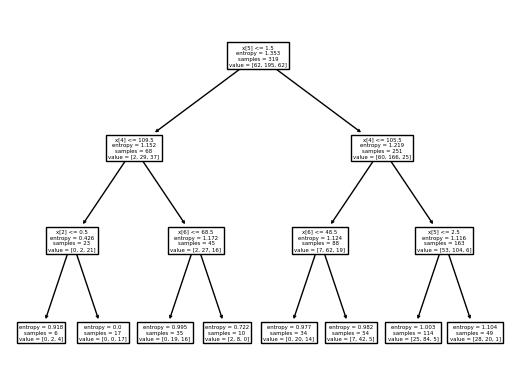

In [97]:
#PLot the decision tree
tree.plot_tree(model);


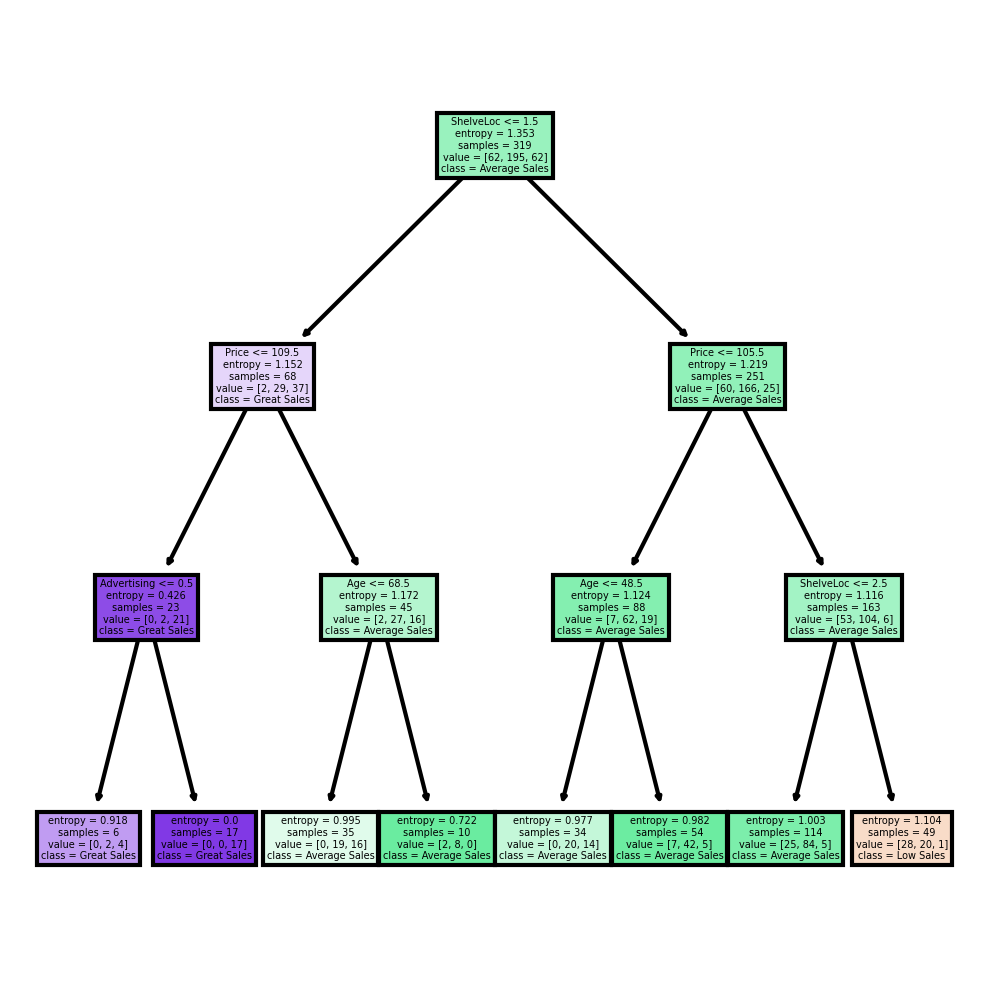

In [98]:
fn=['CompPrice',	'Income',	'Advertising',	'Population',	'Price',	'ShelveLoc',	'Age',	'Education',	'Urban',	'US']
cn=['Low Sales','Average Sales','Great Sales']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn,
               class_names=cn,
               filled = True);

In [99]:
text = tree.export_text(model,max_depth=3)
print(text)

|--- feature_5 <= 1.50
|   |--- feature_4 <= 109.50
|   |   |--- feature_2 <= 0.50
|   |   |   |--- class: 3
|   |   |--- feature_2 >  0.50
|   |   |   |--- class: 3
|   |--- feature_4 >  109.50
|   |   |--- feature_6 <= 68.50
|   |   |   |--- class: 2
|   |   |--- feature_6 >  68.50
|   |   |   |--- class: 2
|--- feature_5 >  1.50
|   |--- feature_4 <= 105.50
|   |   |--- feature_6 <= 48.50
|   |   |   |--- class: 2
|   |   |--- feature_6 >  48.50
|   |   |   |--- class: 2
|   |--- feature_4 >  105.50
|   |   |--- feature_5 <= 2.50
|   |   |   |--- class: 2
|   |   |--- feature_5 >  2.50
|   |   |   |--- class: 1



In [100]:
model.feature_importances_

array([0.        , 0.        , 0.03319563, 0.        , 0.31728684,
       0.46884561, 0.18067192, 0.        , 0.        , 0.        ])